In [1]:
# this jupyter notebook is to demonstrate how to use the package in SciPy/RiemannGrassMann/

import numpy as np
from SciPy.RiemannGrassmann import *

n = 20
p = 5
dist = 1e-1

U0, U1, Delta = grAux.create_random_Grassmann_data(n, p, dist)

In [2]:
# generate deltas
delta_1, u1star_1 = grLog.GrassmannLog(U0, U1)
delta_2 = grLog.GrassmannLog_standard(U0, U1)
delta_3, u1star_3 = grLog.GrassmannLogOneSVD(U0, U1)

In [3]:
#compare deltas to each other, and to the correct one
print( np.linalg.norm(delta_1-delta_2) ) 
print( np.linalg.norm(delta_1-delta_3) ) 
print( np.linalg.norm(delta_2-delta_3) )
print( np.linalg.norm(Delta-delta_1) ) 
print( np.linalg.norm(Delta-delta_3) ) 

grAux.subspaceDist(U0, U1)

8.307432690427628e-16
6.896850001903037e-16
6.469254478006731e-16
8.722010202520705e-16
1.036391018786055e-15


0.25912209423297716

In [4]:
# test exp functions
U1_trial = grExp.Grassmann_Exp(U0, Delta)
print(np.linalg.norm(U1 - U1_trial))

U1_trial_naive = grExp.Grassmann_Exp_Naive(U0, Delta)
print(np.linalg.norm(U1 - U1_trial_naive))


0.0
1.5961980821310422e-15


In [5]:
# time to stress test:-
# find the span, and choose some ortho vectors from it:
U0_span = U0 @ U0.T
U0_eval, U0_evec = np.linalg.eigh(U0_span)
U0_ortho = U0_evec[:,:p] # pick first p of the 0 evals

In [6]:
# test the deltas, but now for moving to ortho vectors (extreme case)
delta_1, u1star_1 = grLog.GrassmannLog(U0, U0_ortho)
delta_2 = grLog.GrassmannLog_standard(U0, U0_ortho)
delta_3, u1star_3 = grLog.GrassmannLogOneSVD(U0, U0_ortho)

print( np.linalg.norm(delta_1-delta_2) )
print( np.linalg.norm(delta_1-delta_3) )
print( np.linalg.norm(delta_2-delta_3) )

grAux.subspaceDist(U0, U0_ortho)


8.815645837334911e-08
8.815645552892628e-08
5.443980895258102e-15


3.512407365520363

In [7]:
# test exp functions
U0_ortho_trial = grExp.Grassmann_Exp_Naive(U0_ortho, delta_2)
print( np.linalg.norm(U0_ortho_trial - U0_ortho) )

U0_ortho_trial_naive = grExp.Grassmann_Exp(U0_ortho, delta_2)
print( np.linalg.norm(U0_ortho_trial_naive - U0_ortho) )

2.150689739777704e-15
3.386088463476592


In [8]:
# test sign problem now (problematic if used steifel logarithm):
random_sign_change = np.diag((2*np.random.randint(0,2,size=p)-1))
U0_phase = U0 @ random_sign_change

delta_phase = grLog.GrassmannLog_standard(U0, U0_phase)

U0_phase_trial = grExp.Grassmann_Exp(U0, delta_phase)
# U0_phase_trial = grExp.Grassmann_Exp_Naive(U0, delta_phase)

print( np.linalg.norm(U0 @ U0.T - U0_phase @ U0_phase.T))
print( np.linalg.norm(U0 @ U0.T - U0_phase_trial @ U0_phase_trial.T))
print( np.linalg.norm(U0_phase @ U0_phase.T - U0_phase_trial @ U0_phase_trial.T))


0.0
3.065964590434287e-15
3.065964590434287e-15


approxSingularcase


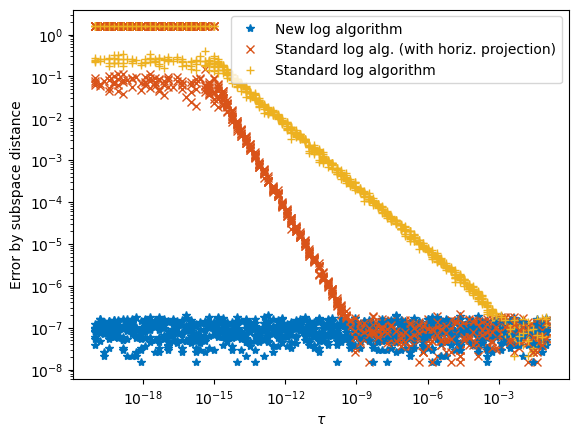

In [9]:
grApproxSingularcase.test(100, 20, 10, 1, np.logspace(-20, -1, 100))

approxSingularcase


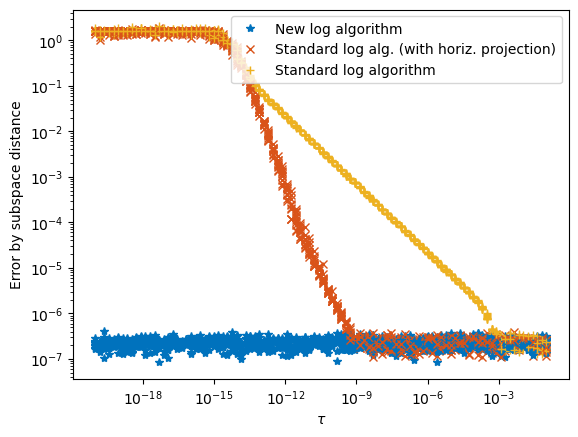

In [10]:
# grApproxSingularcase.test()